In [84]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set()

import xai
import shap
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report,accuracy_score,recall_score,confusion_matrix,precision_score # to check model performance
from sklearn.model_selection import train_test_split # split the data into train and test
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features 
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression # to build Logistic Regression model
from sklearn.tree import DecisionTreeClassifier # to build Decision Tree Model
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier # to build RF and GBClassifier

from warnings import filterwarnings #to filter out warnings
filterwarnings('ignore')

In [85]:
df = pd.read_csv("Chocolate.csv")
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0.0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0.0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0.0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0.0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0.0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0.0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0.0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1.0,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0.0,0.186,0.267,41.904308


In [86]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'Multiple Pieces',
       'sugarpercent', 'pricepercent', 'winpercent'],
      dtype='object')

In [87]:
#df["Multiple Pieces"] = df["Multiple Pieces"].astype("int64")

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   Multiple Pieces   61 non-null     float64
 10  sugarpercent      85 non-null     float64
 11  pricepercent      82 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(4), int64(8), object(1)
memory usage: 8.8+ KB


In [89]:
df[["sugarpercent","pricepercent","winpercent"]].describe().T

,count,mean,std,min,25%,50%,75%,max
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800
pricepercent,82.0,0.467195,0.283934,0.011000,0.258000,0.465000,0.651000,0.97600
winpercent,85.0,50.316764,14.714357,22.445341,39.141056,47.829754,59.863998,84.18029


In [90]:
df.isnull().sum()

competitorname       0
chocolate            0
fruity               0
caramel              0
peanutyalmondy       0
nougat               0
crispedricewafer     0
hard                 0
bar                  0
Multiple Pieces     24
sugarpercent         0
pricepercent         3
winpercent           0
dtype: int64

## Data Preprocessing

In [91]:
df.isnull().sum()

competitorname       0
chocolate            0
fruity               0
caramel              0
peanutyalmondy       0
nougat               0
crispedricewafer     0
hard                 0
bar                  0
Multiple Pieces     24
sugarpercent         0
pricepercent         3
winpercent           0
dtype: int64

In [92]:
df["pricepercent"] = df["pricepercent"].fillna(df["pricepercent"].median()) 
#filling the missing values with the median of the related feature

In [93]:
df.isnull().sum() # no more missing values in pricepercent

competitorname       0
chocolate            0
fruity               0
caramel              0
peanutyalmondy       0
nougat               0
crispedricewafer     0
hard                 0
bar                  0
Multiple Pieces     24
sugarpercent         0
pricepercent         0
winpercent           0
dtype: int64

In [94]:
df["Multiple Pieces"].value_counts() #checking the most frequent value for "Multiple Pieces" column

0.0    32
1.0    29
Name: Multiple Pieces, dtype: int64

In [95]:
df["Multiple Pieces"].fillna(0.0,inplace=True) #filling the missing values with the most frequent value which is 0.0

In [96]:
df.isnull().sum() # No more missing values

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
Multiple Pieces     0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [97]:
df["Multiple Pieces"] = df["Multiple Pieces"].astype("int64") # transforming the related column from float to integer data type

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   Multiple Pieces   85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [99]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [100]:
scaler = MinMaxScaler()
scaler.fit(df[["winpercent"]])
df["winpercent"] = scaler.transform(df[["winpercent"]])
# Min-Max Normalization for winpercent feature

In [101]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,0.721251
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,0.731475
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,0.158998
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,0.383432
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,0.484266


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.

In [102]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'Multiple Pieces',
       'sugarpercent', 'pricepercent', 'winpercent'],
      dtype='object')

In [103]:
categorical_features = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat', 'crispedricewafer',
                        'hard', 'bar', 'Multiple Pieces']
numeric_features = ["sugarpercent","pricepercent","winpercent"]

## Categorical Features Analysis

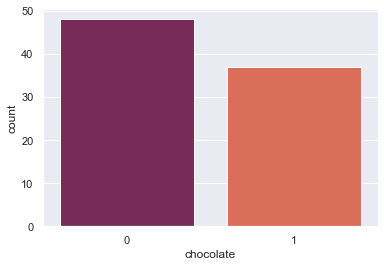

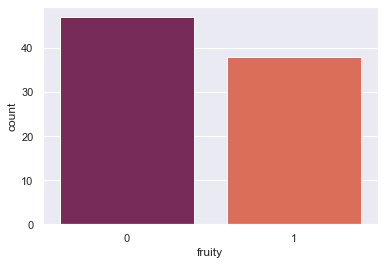

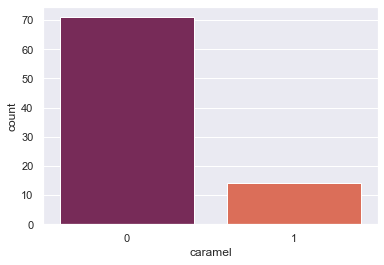

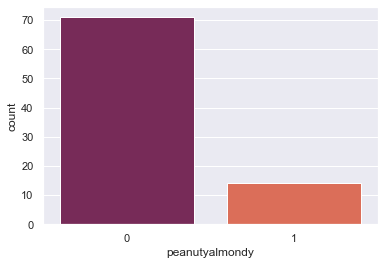

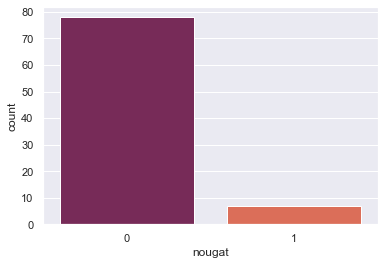

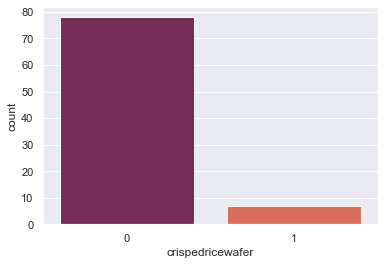

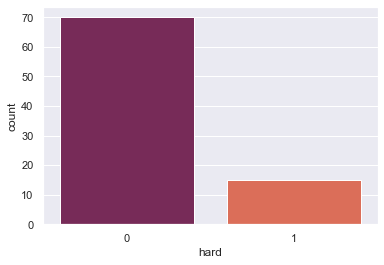

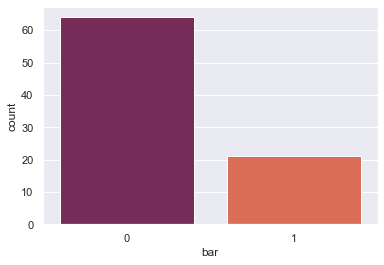

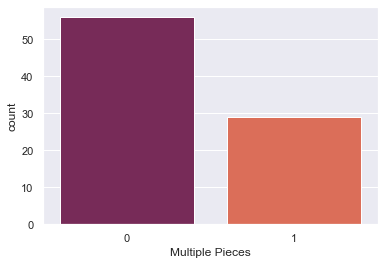

In [104]:
for i in categorical_features:
    sns.countplot(x=i, data=df,palette="rocket")
    plt.show()

## Numeric Features Analysis

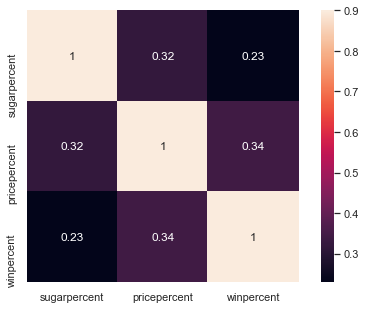

In [105]:
corrmat = df[numeric_features].corr(method='pearson')
plt.subplots(figsize=(8,5))
sns.heatmap(corrmat, annot=True, vmax=0.9, square=True);
#Correlation matrix for numeric features

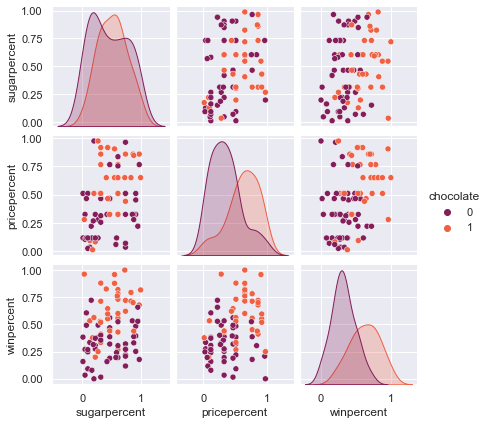

In [106]:
data_temp = df[["sugarpercent","pricepercent","winpercent","chocolate"]]
sns.pairplot(data_temp, hue="chocolate",palette="rocket",height=2);

## Train - Test Split

In [107]:
y=df["chocolate"] #output column
X=df.drop(["chocolate","competitorname"],axis=1) #train columns
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=42) #30% testing,70%training

### Logistic Regression

In [108]:
log_reg = LogisticRegression()
log_model = log_reg.fit(X_train,y_train) # Fitting the model
y_pred_log_reg_test = log_model.predict(X_test) # Calculating the predictions using the model for testing set

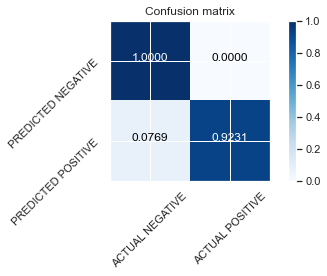

In [109]:
xai.confusion_matrix_plot(y_test, y_pred_log_reg_test)

In [110]:
print(classification_report(y_test,y_pred_log_reg_test)) # Classification report for testing dataset

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.92      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



## SHAP for Logistic Regression Model

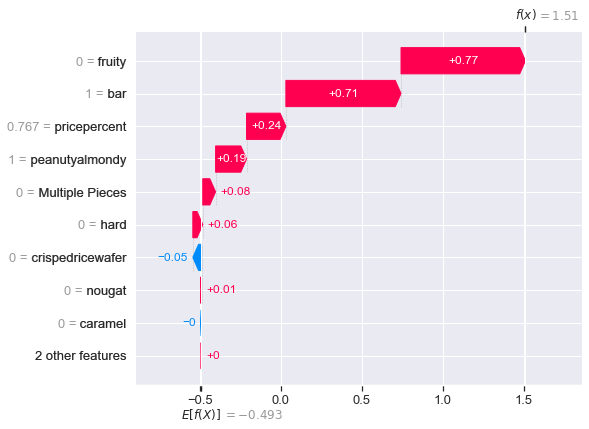

In [111]:
explainer = shap.Explainer(log_model, X)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[0])

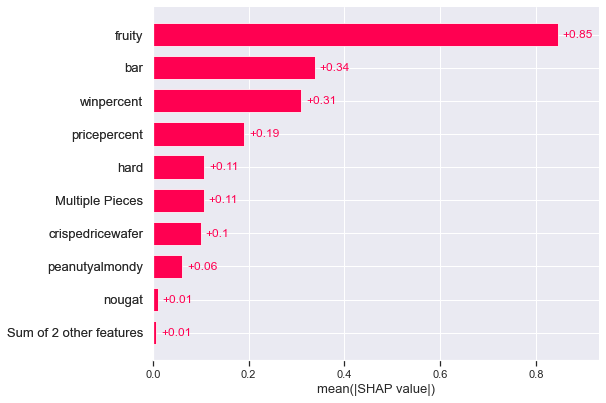

In [112]:
shap.plots.bar(shap_values)

In [113]:
shap.initjs()
shap.plots.force(shap_values[0])

## Permutation Importance for Logistic Regression Model

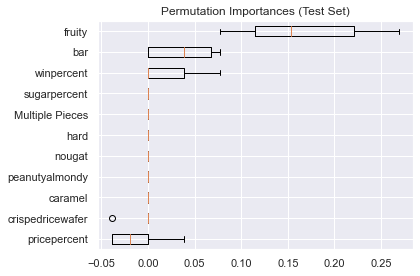

In [114]:
result = permutation_importance(log_model, X_test.iloc[:,0:], y_test, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,vert=False, labels=X_test.iloc[:,0:].columns[sorted_idx])
ax.set_title("Permutation Importances (Test Set)")
fig.tight_layout()
plt.show()

### Decision Tree Classifier

In [115]:
decision_tree = DecisionTreeClassifier()
decision_tree_model=decision_tree.fit(X_train,y_train)
feature_names = list(X_train.columns)

In [116]:
y_pred_decision = decision_tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_decision)
print ("Confusion Matrix : \n", cm)
print('Accuracy of testing data for Decision Tree: ',round(accuracy_score(y_test,y_pred_decision),3))
print('Recall of testing data for Decision Tree: ',round(recall_score(y_test,y_pred_decision),3))
print('Precision of testing data for Decision Tree: ',round(precision_score(y_test,y_pred_decision),3))

Confusion Matrix : 
 [[13  0]
 [ 3 10]]
Accuracy of testing data for Decision Tree:  0.885
Recall of testing data for Decision Tree:  0.769
Precision of testing data for Decision Tree:  1.0


## SHAP for Decision Tree Model

In [117]:
explainer = shap.TreeExplainer(decision_tree_model)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

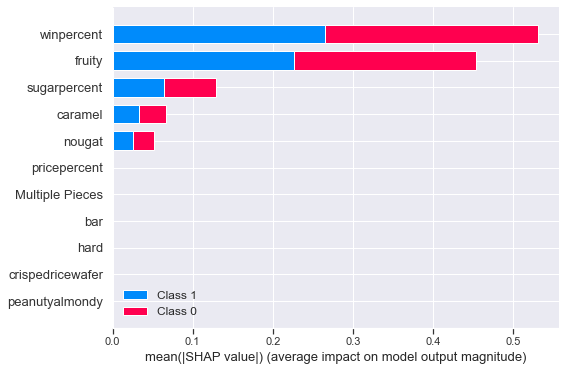

In [118]:
shap.summary_plot(shap_values, X_test) 
# If the shap value is much closer to zero, we can say that the data point contributes very little to predictions.
# A summary plot of all the computed Shapley values gives a sense of the global behavior of the estimator

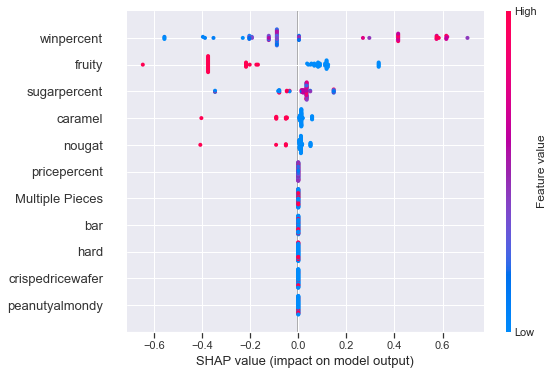

'\nAll of the features are listed in y-axis in the rank order, the top one being the most contributor to the predictions and \nthe bottom one being the least or zero-contributor. Shap values are provided in the x-axis. As we discussed already, a value of \nzero represents no contribution whereas contributions increase as the shap value moves away from zero\nOn the y-axis, the features are sorted by decreasing order of importance.\n'

In [119]:
explainer = shap.TreeExplainer(decision_tree_model)
shap_values = explainer.shap_values(X_train, approximate=False, check_additivity=False)

shap.summary_plot(shap_values[1], X_train)

# If the shap value is a strong positive or strong negative value, 
# we can say that the data point greatly contributes to predicting the positive or negative class.

"""
All of the features are listed in y-axis in the rank order, the top one being the most contributor to the predictions and 
the bottom one being the least or zero-contributor. Shap values are provided in the x-axis. As we discussed already, a value of 
zero represents no contribution whereas contributions increase as the shap value moves away from zero
On the y-axis, the features are sorted by decreasing order of importance.
"""

In [120]:
explainer = shap.TreeExplainer(decision_tree_model)
shap_values = explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0]) 

In [121]:
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test) 

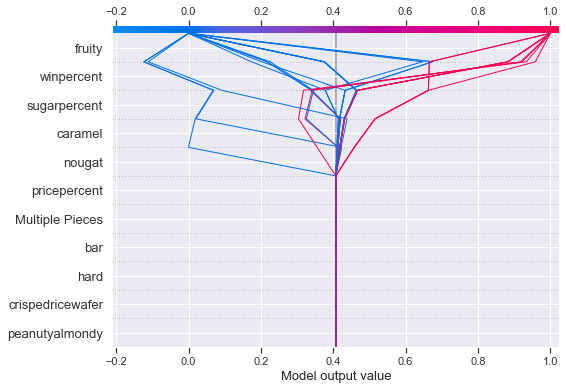

In [122]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X)

# From bottom to top of the decision plot, shap values are cumulatively added to the base value of the model in determining the output values.
# t can be observed that certain strings colored in blue resulted in final class value 0 and the remaining strings colored in red resulted in final class value 1.

## Permutation Importance and Feature Importance for Decision Tree Model

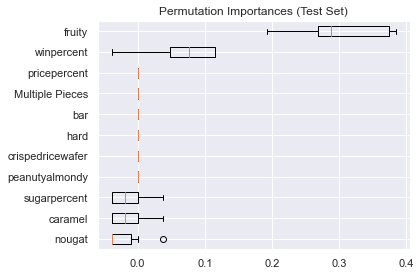

In [123]:
result = permutation_importance(decision_tree_model, X_test.iloc[:,0:], y_test, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,vert=False, labels=X_test.iloc[:,0:].columns[sorted_idx])
ax.set_title("Permutation Importances (Test Set)")
fig.tight_layout()
plt.show()

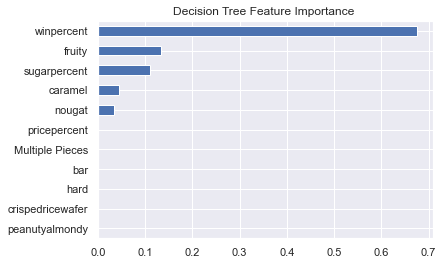

In [124]:
feat_importances = pd.Series(decision_tree_model.feature_importances_, index=X_test.iloc[:,0:].columns)
feat_importances.sort_values(ascending=True,inplace=True)
feat_importances.plot(kind='barh')
plt.title('Decision Tree Feature Importance ')
plt.show()

### Random Forest Classifier

In [125]:
random_forest = RandomForestClassifier()
random_forest_model=random_forest.fit(X_train,y_train)

In [126]:
y_pred_random = random_forest_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_random)
print ("Confusion Matrix : \n", cm)
print('Accuracy of testing data for Random Forest: ',round(accuracy_score(y_test,y_pred_random),3))
print('Recall of testing data for Random Forest: ',round(recall_score(y_test,y_pred_random),3))
print('Precision of testing data for Random Forest: ',round(precision_score(y_test,y_pred_random),3))

Confusion Matrix : 
 [[13  0]
 [ 1 12]]
Accuracy of testing data for Random Forest:  0.962
Recall of testing data for Random Forest:  0.923
Precision of testing data for Random Forest:  1.0


## SHAP for Random Forest Model

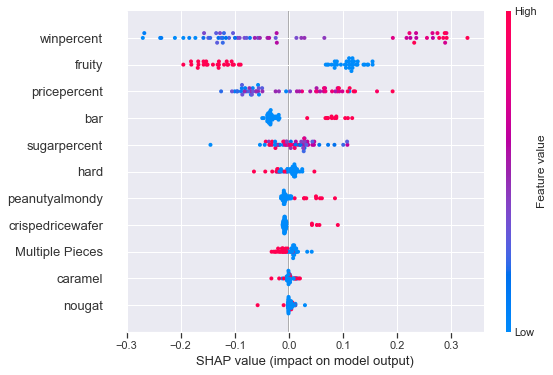

In [127]:
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_train, approximate=False, check_additivity=False)
shap.summary_plot(shap_values[1], X_train)

In [128]:
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0])

#The fruity feature of this individual is what drives the prediction above the baseline the most,followed by pricepercent.

In [129]:
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_test.iloc[10])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[10])

# Observation #10 has very low predicted (and observed) charges.

## Permutation Importance and Feature Importance for Random Forest Model

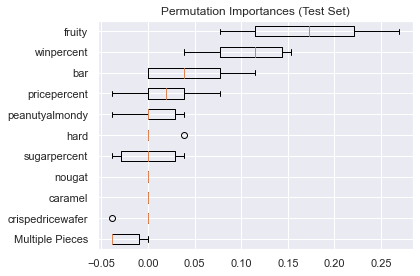

In [130]:
result = permutation_importance(random_forest_model, X_test.iloc[:,0:], y_test, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,vert=False, labels=X_test.iloc[:,0:].columns[sorted_idx])
ax.set_title("Permutation Importances (Test Set)")
fig.tight_layout()
plt.show()

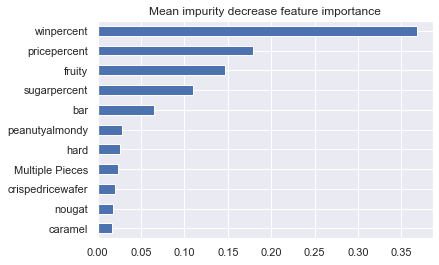

In [131]:
feat_importances = pd.Series(random_forest_model.feature_importances_, index=X_test.iloc[:,0:].columns)
feat_importances.sort_values(ascending=True,inplace=True)
feat_importances.plot(kind='barh')
plt.title('Mean impurity decrease feature importance')
plt.show()

### Gradient Boosting Classifier

In [132]:
gbm = GradientBoostingClassifier(n_estimators=1000)
gbm_model = gbm.fit(X_train,y_train)

In [133]:
y_pred_gbm = gbm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbm)
print ("Confusion Matrix : \n", cm)
print('Accuracy of testing data for Gradient Boosting: ',round(accuracy_score(y_test,y_pred_gbm),3))
print('Recall of testing data for Gradient Boosting: ',round(recall_score(y_test,y_pred_gbm),3))
print('Precision of testing data for Gradient Boosting: ',round(precision_score(y_test,y_pred_gbm),3))

Confusion Matrix : 
 [[13  0]
 [ 1 12]]
Accuracy of testing data for Gradient Boosting:  0.962
Recall of testing data for Gradient Boosting:  0.923
Precision of testing data for Gradient Boosting:  1.0


## SHAP for Gradient Boosting Model

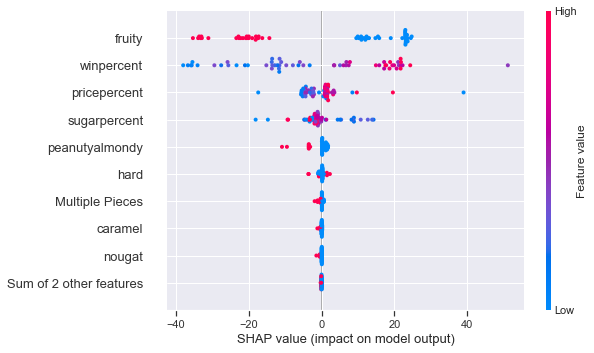

In [134]:
explainer = shap.Explainer(gbm_model, X)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values)

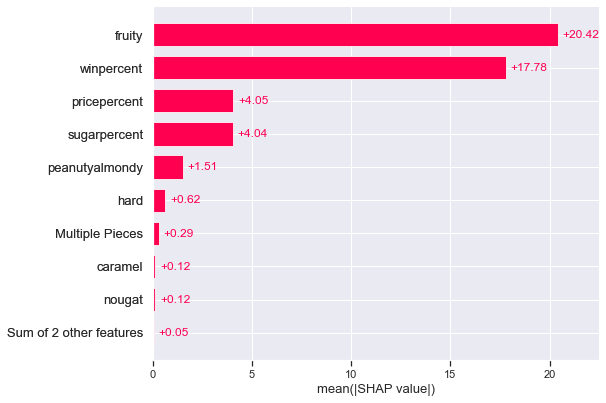

In [135]:
shap.plots.bar(shap_values)

In [136]:
shap.initjs()
shap.plots.force(shap_values[0])

## Permutation Importance and Feature Importance for Gradient Boosting Model

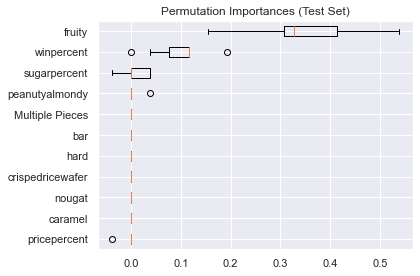

In [137]:
result = permutation_importance(gbm_model, X_test.iloc[:,0:], y_test, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,vert=False, labels=X_test.iloc[:,0:].columns[sorted_idx])
ax.set_title("Permutation Importances (Test Set)")
fig.tight_layout()
plt.show()

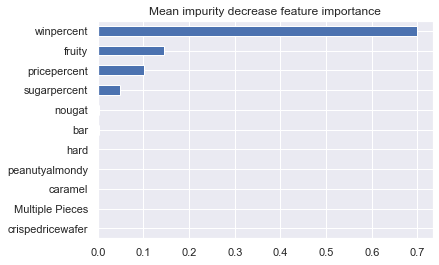

In [138]:
feat_importances = pd.Series(gbm_model.feature_importances_, index=X_test.iloc[:,0:].columns)
feat_importances.sort_values(ascending=True,inplace=True)
feat_importances.plot(kind='barh')
plt.title('Mean impurity decrease feature importance')
plt.show()

# CLUSTERING SECTION

In [61]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,MeanShift,estimate_bandwidth,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler,RobustScaler
from itertools import cycle
from scipy.cluster.hierarchy import linkage,dendrogram

In [62]:
df = pd.read_csv("Chocolate.csv")
df_clustering = df.drop(["competitorname","chocolate"],axis=1)
df_clustering.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent,winpercent
0,0,1,0,0,1,0,1,0.0,0.732,0.860,66.971725
1,0,0,0,1,0,0,1,0.0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0.0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0.0,0.011,0.511,46.116505
4,1,0,0,0,0,0,0,0.0,0.906,0.511,52.341465


In [63]:
df_clustering.isnull().sum()

fruity               0
caramel              0
peanutyalmondy       0
nougat               0
crispedricewafer     0
hard                 0
bar                  0
Multiple Pieces     24
sugarpercent         0
pricepercent         3
winpercent           0
dtype: int64

In [64]:
df_clustering["pricepercent"] = df_clustering["pricepercent"].fillna(df_clustering["pricepercent"].median()) 
#filling the missing values with the median of the related feature
df_clustering["Multiple Pieces"].fillna(0.0,inplace=True) #filling the missing values with the most frequent value which is 0.0

In [65]:
df_clustering.isnull().sum()

fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
Multiple Pieces     0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

## Clustering Before Scaling the Features

* Intertia measures how far samples are from their centroids and desired results of the clusters that are not spread out the centers, so lower values of the inertia are better. In fact, K-Means aims to place the clusters in a way that minimizes the inertia.

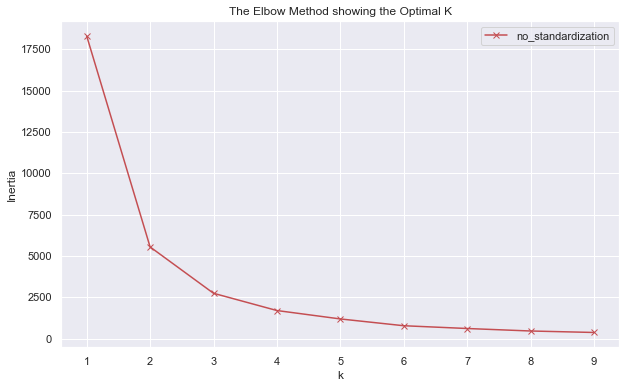

In [66]:
distortions_without_standardization = []
k_number = range(1,10)
for k in k_number:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_clustering)
    distortions_without_standardization.append(km.inertia_)    

plt.figure(figsize=(10,6))
plt.plot(k_number, distortions_without_standardization, 'rx-',label='no_standardization')
plt.legend()
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the Optimal K')
plt.ticklabel_format(style='plain')
plt.show()

In [67]:
for n_clusters in [2,3,4,5]:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_clustering)

    score = silhouette_score(df_clustering, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
# When n_clusters is 2, silhouette score is the highest so we can choose K as 2.

For n_clusters = 2, silhouette score is 0.5850075326266083)
For n_clusters = 3, silhouette score is 0.5356289678978283)
For n_clusters = 4, silhouette score is 0.5099561253600685)
For n_clusters = 5, silhouette score is 0.4882309481937605)


In [68]:
km = KMeans(n_clusters=2, random_state=42)
labels_kmeans = km.fit_predict(df_clustering)
labels_kmeans

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int32)

In [69]:
df_clustering['Cluster_NonNormalized'] = labels_kmeans
df_clustering.head(5)

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent,winpercent,Cluster_NonNormalized
0,0,1,0,0,1,0,1,0.0,0.732,0.860,66.971725,0
1,0,0,0,1,0,0,1,0.0,0.604,0.511,67.602936,0
2,0,0,0,0,0,0,0,0.0,0.011,0.116,32.261086,1
3,0,0,0,0,0,0,0,0.0,0.011,0.511,46.116505,1
4,1,0,0,0,0,0,0,0.0,0.906,0.511,52.341465,0


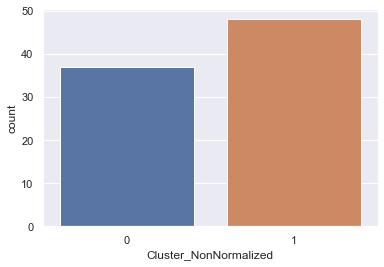

In [70]:
sns.countplot(df_clustering.Cluster_NonNormalized);

## Clustering After Scaling the Features

In [71]:
stscaler = StandardScaler()
robust = RobustScaler()

data_model_standard = pd.DataFrame(stscaler.fit_transform(df_clustering), columns=df_clustering.columns)
data_model_robust = pd.DataFrame(robust.fit_transform(df_clustering), columns=df_clustering.columns)

* In order to determine the number of clusters, inertia is calculated for different K values from 1 to 9 with K-Means algorithm. According to Elbow method and Silhouette Coefficient values, the number of clusters is determined as 2 for K-Means algorithm.

* First of all, two different normalization methods have been approaches to reduce the inertia. How spread out the samples within each cluster is can be measured by the "inertia". Intertia measures how far samples are from their centroids and desired results of the clusters that are not spread out the centers, so lower values of the inertia are better. In fact, K-Means aims to place the clusters in a way that minimizes the inertia. In a nutshell, in a good clustering project provides lower inertia and doesn't have too many clusters.

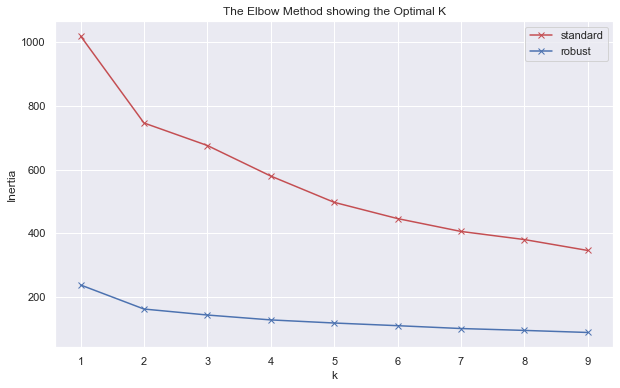

In [72]:
distortions_robust = []
distortions_standard = []
k_number = range(1,10)
for k in k_number:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_model_robust)
    distortions_robust.append(km.inertia_)    
    km.fit(data_model_standard)
    distortions_standard.append(km.inertia_)


plt.figure(figsize=(10,6))
plt.plot(k_number, distortions_standard, 'rx-',label='standard')
plt.plot(k_number, distortions_robust, 'bx-',label='robust')
plt.legend()
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the Optimal K')
plt.show()

* The silhouette score of 1 means that the clusters are very dense and nicely separated, the score of 0 means that clusters are overlapping and the score of less than 0 means that data belonging to clusters may be wrong/incorrect.

In [73]:
print('Robust Scaled')
for n_clusters in [2,3,4,5,6]:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(data_model_robust)

    score = silhouette_score(df_clustering, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
print('Standard Scaled')
for n_clusters in [2,3,4,5,6]:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_clustering)

    score = silhouette_score(data_model_standard, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score)) 

Robust Scaled
For n_clusters = 2, silhouette score is 0.41121531904310116)
For n_clusters = 3, silhouette score is 0.09131566781444937)
For n_clusters = 4, silhouette score is 0.033058437432778795)
For n_clusters = 5, silhouette score is -0.044763415451422484)
For n_clusters = 6, silhouette score is -0.04007316439250091)
Standard Scaled
For n_clusters = 2, silhouette score is 0.1968855076482754)
For n_clusters = 3, silhouette score is 0.05661558724062436)
For n_clusters = 4, silhouette score is 0.012136204047765194)
For n_clusters = 5, silhouette score is -0.011626048777031415)
For n_clusters = 6, silhouette score is -0.022870509045584093)


In [74]:
data_model_robust = data_model_robust.drop("Cluster_NonNormalized",axis=1)
km = KMeans(n_clusters=2, random_state=42)
labels_kmeans_modified = km.fit_predict(data_model_robust)
labels_kmeans_modified

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int32)

In [75]:
df_clustering['Cluster_RobustScaled'] = labels_kmeans_modified
df_clustering.head(10)

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent,winpercent,Cluster_NonNormalized,Cluster_RobustScaled
0,0,1,0,0,1,0,1,0.0,0.732,0.860,66.971725,0,1
1,0,0,0,1,0,0,1,0.0,0.604,0.511,67.602936,0,1
2,0,0,0,0,0,0,0,0.0,0.011,0.116,32.261086,1,0
3,0,0,0,0,0,0,0,0.0,0.011,0.511,46.116505,1,0
4,1,0,0,0,0,0,0,0.0,0.906,0.511,52.341465,0,0
5,0,0,1,0,0,0,1,0.0,0.465,0.767,50.347546,1,1
6,0,1,1,1,0,0,1,0.0,0.604,0.767,56.914547,0,1
7,0,0,1,0,0,0,0,0.0,0.313,0.465,23.417824,1,0
8,0,0,0,0,0,0,0,0.0,0.906,0.325,38.010963,1,0
9,1,1,0,0,0,0,0,0.0,0.604,0.325,34.517681,1,0


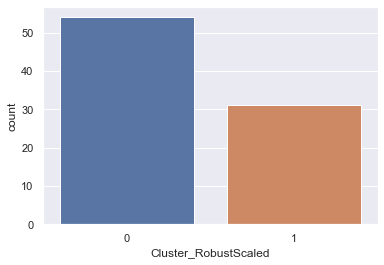

In [76]:
sns.countplot(df_clustering.Cluster_RobustScaled);

## MeanShift Clustering

In [77]:
df_meanshift = df_clustering.drop(["Cluster_NonNormalized","Cluster_RobustScaled"],axis=1)
df_meanshift.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent,winpercent
0,0,1,0,0,1,0,1,0.0,0.732,0.860,66.971725
1,0,0,0,1,0,0,1,0.0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0.0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0.0,0.011,0.511,46.116505
4,1,0,0,0,0,0,0,0.0,0.906,0.511,52.341465


In [78]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using the code.
bandwidth = estimate_bandwidth(df_meanshift, quantile=0.2)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit_predict(df_meanshift)
cluster_centers = ms.cluster_centers_
labels = ms.labels_

In [79]:
labels_unique_meanshift = np.unique(labels)
n_clusters_ = len(labels_unique_meanshift)

print("Number of estimated clusters : %d" % n_clusters_)

Number of estimated clusters : 6


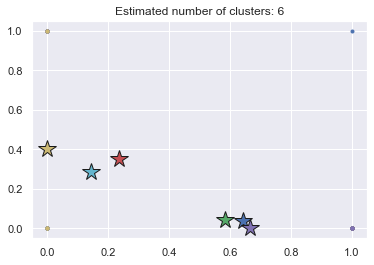

In [80]:
data_values=df_meanshift.values
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(data_values[my_members, 0], data_values[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], '*', markerfacecolor=col,
             markeredgecolor='k', markersize=18)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Hierarchical Clustering

In [81]:
hc_average = linkage(df_meanshift, "average")

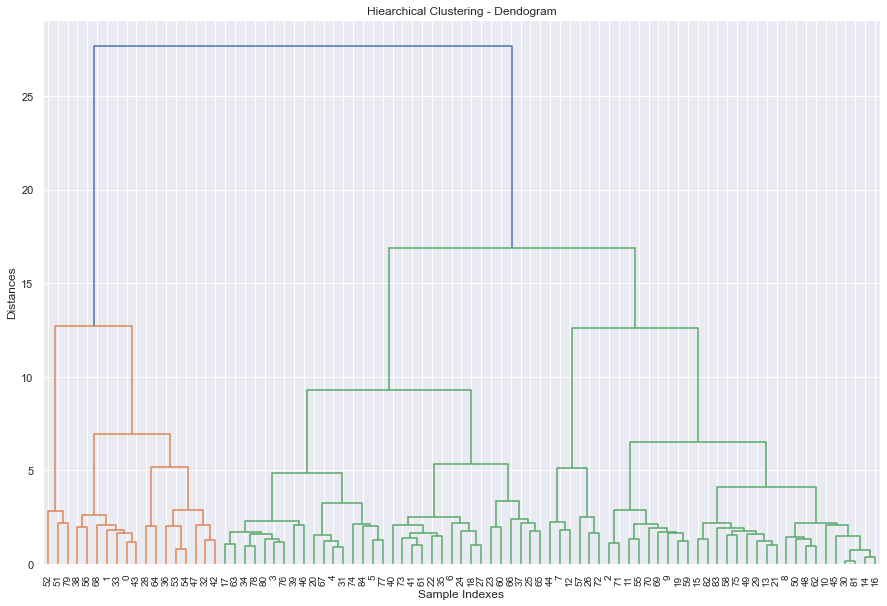

In [82]:
plt.figure(figsize=(15, 10))
plt.title('Hiearchical Clustering - Dendogram')
plt.xlabel('Sample Indexes')
plt.ylabel('Distances')
dendrogram(hc_average,leaf_font_size=10);

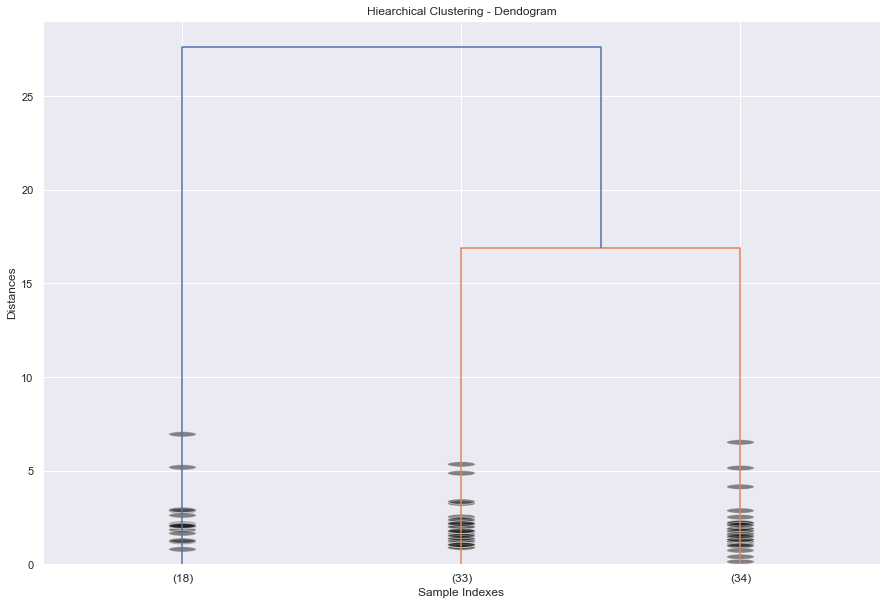

In [83]:
plt.figure(figsize=(15, 10))
plt.title('Hiearchical Clustering - Dendogram')
plt.xlabel('Sample Indexes')
plt.ylabel('Distances')
dendrogram(hc_average,truncate_mode = "lastp",p = 3,show_contracted = True);

In [78]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
labels_hierarchical = cluster.fit_predict(df_meanshift)
df_meanshift["Hiearchical_Labels"] = labels_hierarchical

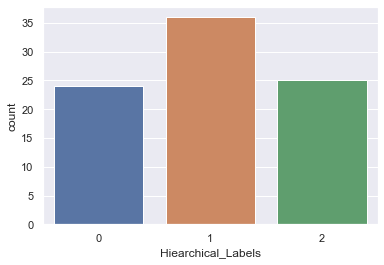

In [79]:
sns.countplot(df_meanshift.Hiearchical_Labels);